 ## Linear regression model predicts continuous values

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Sample data: Area in square feet (X) and corresponding house price in $1000s (y)
# For simplicity, let's simulate a linear relationship: price = 50 * area + some noise
X = np.array([[650], [800], [950], [1100], [1250], [1400], [1550], [1700], [1850], [2000]])
y = np.array([325, 400, 475, 550, 625, 700, 775, 850, 925, 1000])  # Prices in $1000s

In [4]:
# Create a linear regression model
model = LinearRegression()

In [6]:
# Train the model with the data
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# Make predictions on the same data to visualize the line of best fit
y_pred = model.predict(X)

In [8]:
# Print model parameters
print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y, y_pred))

Model Coefficient (Slope): 0.49999999999999994
Model Intercept: 1.1368683772161603e-13
Mean Squared Error: 9.693522803355793e-28


In [9]:
# Predict price for a new house (e.g., 1600 sq. ft)
new_area = [[1600]]
predicted_price = model.predict(new_area)[0]
print(f"\nPredicted price for 1600 sq.ft: ${predicted_price * 1000:.2f}")


Predicted price for 1600 sq.ft: $800000.00


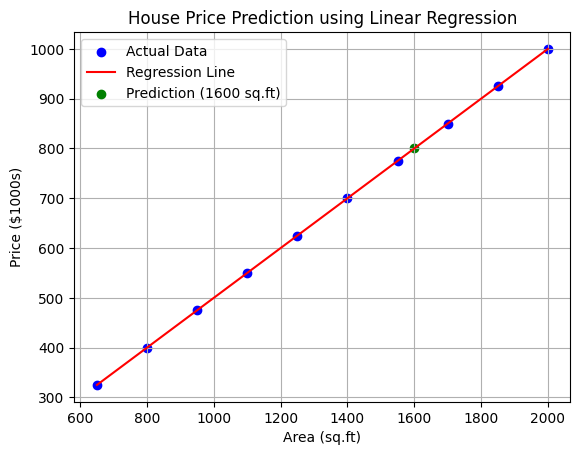

In [10]:
 # Plotting
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.scatter(new_area, predicted_price, color='green', label='Prediction (1600 sq.ft)')
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price ($1000s)")
plt.title("House Price Prediction using Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

## Logistic regression for binary classification
-  classify whether a student will pass (1) or fail (0) based on study hours.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [12]:
# Simulated data: Hours studied (X) vs. pass/fail (y)
# Label: 1 = Pass, 0 = Fail
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [13]:
# Create a logistic regression model
model = LogisticRegression()

In [14]:
# Train the model
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
# Predict probabilities for each input
y_prob = model.predict_proba(X)[:, 1]  # Probability of class "1" (Pass)

In [16]:
# Predict labels
y_pred = model.predict(X)

In [17]:
# Print the model parameters
print("Model Coefficient (Slope):", model.coef_[0][0])
print("Model Intercept:", model.intercept_[0])
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=["Fail", "Pass"]))

Model Coefficient (Slope): 1.181949430069053
Model Intercept: -5.311674343465788

Classification Report:
              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00         4
        Pass       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [18]:
# Predict outcome for a student who studied 5.5 hours
test_hours = [[5.5]]
predicted = model.predict(test_hours)[0]
probability = model.predict_proba(test_hours)[0][1]

In [19]:
print(f"\nStudent who studied 5.5 hours is predicted to: {'Pass' if predicted else 'Fail'}")
print(f"Probability of passing: {probability:.2f}")


Student who studied 5.5 hours is predicted to: Pass
Probability of passing: 0.77


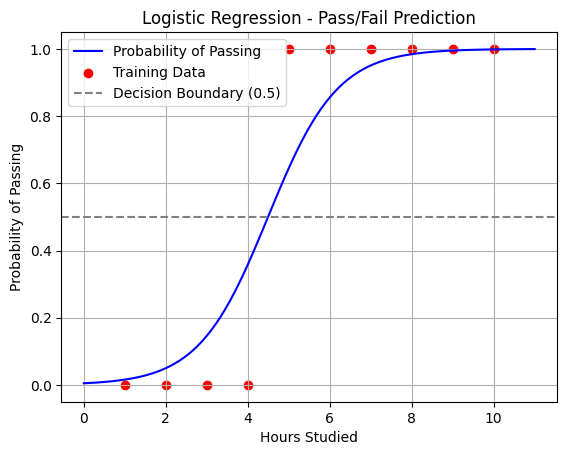

In [20]:
# Plot the sigmoid curve
hours_range = np.linspace(0, 11, 100).reshape(-1, 1)
probabilities = model.predict_proba(hours_range)[:, 1]
 
plt.plot(hours_range, probabilities, color='blue', label='Probability of Passing')
plt.scatter(X, y, color='red', label='Training Data')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Boundary (0.5)')
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression - Pass/Fail Prediction")
plt.legend()
plt.grid(True)
plt.show()

## K-means clustering for customer segmentation
- identify customer segments like "high spenders" or "budget-conscious" shoppers.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [22]:
# Sample data: (Annual Income in $1000s, Spending Score)
# This simulates basic customer behavior
X = np.array([
    [15, 39], [16, 81], [17, 6], [18, 77], [19, 40], [20, 76],
    [25, 50], [30, 60], [35, 80], [40, 20],
    [60, 85], [65, 70], [70, 60], [75, 50], [80, 30],
    [85, 90], [90, 70], [95, 40], [100, 20], [105, 10]
])

In [23]:
# Create KMeans model with k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

In [24]:
# Fit the model and predict clusters
y_kmeans = kmeans.fit_predict(X)

In [25]:
# Get cluster centers
centers = kmeans.cluster_centers_

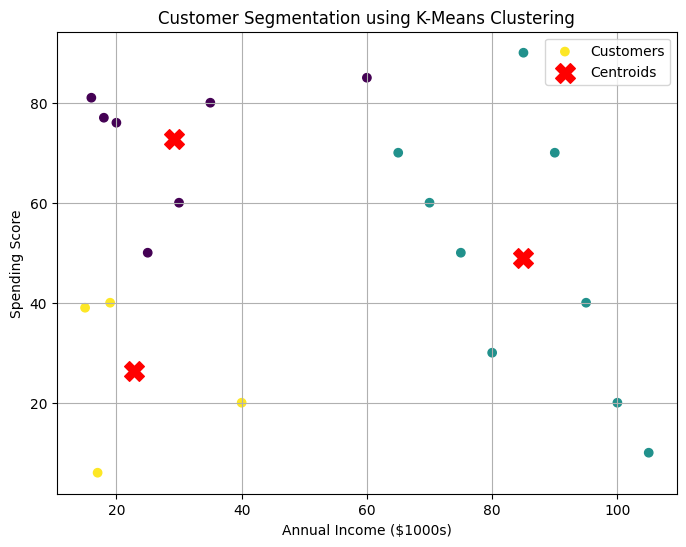

In [26]:
# Plot the clusters with different colors
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', label='Customers')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel("Annual Income ($1000s)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation using K-Means Clustering")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Display final cluster centers
print("Cluster Centers (Annual Income, Spending Score):")
for i, center in enumerate(centers):
    print(f"Cluster {i + 1}: Income = {center[0]:.2f}, Spending Score = {center[1]:.2f}")

Cluster Centers (Annual Income, Spending Score):
Cluster 1: Income = 29.14, Spending Score = 72.71
Cluster 2: Income = 85.00, Spending Score = 48.89
Cluster 3: Income = 22.75, Spending Score = 26.25


 ## Decision tree classifier for Iris dataset

In [28]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
 

In [29]:
# Load the Iris dataset
iris = load_iris()
X = iris.data      # Features: sepal length, sepal width, petal length, petal width
y = iris.target    # Labels: 0 = setosa, 1 = versicolor, 2 = virginica

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Create and train the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
# Predict on the test set
y_pred = model.predict(X_test)

In [33]:
# Evaluate the model
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



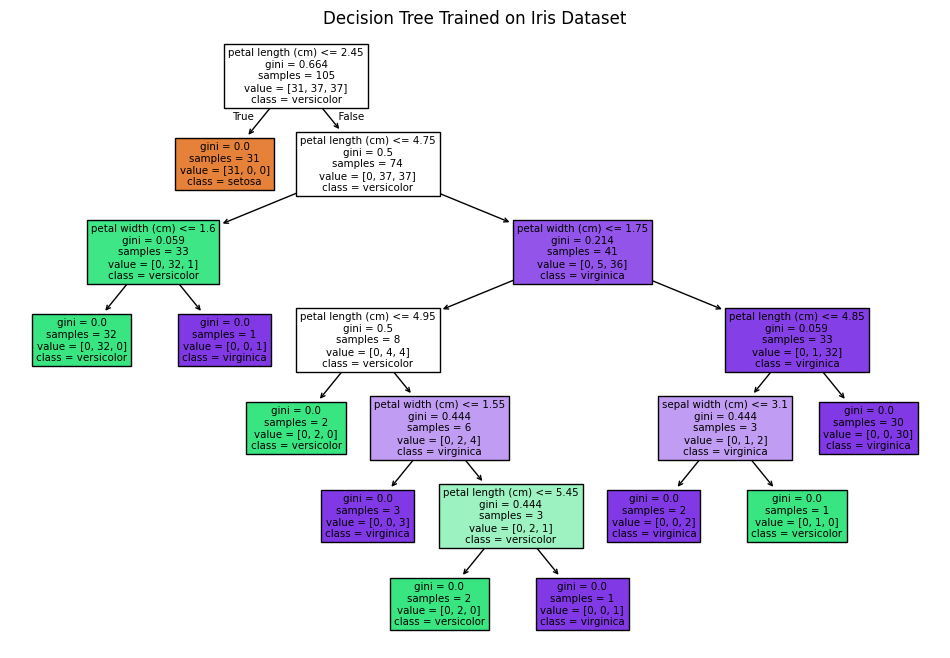

In [34]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Trained on Iris Dataset")
plt.show()

## Simple neural network
-  the inner workings of neural networks, including forward propagation, loss calculation, and backpropagation
- Has 2 input neurons, 1 hidden layer with 4 neurons, and 1 output neuron
- Learns to model the XOR pattern (a nonlinear problem)

In [38]:
import numpy as np

In [39]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [40]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [41]:
# Sample input data (4 examples, 2 features each)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

In [42]:
# Target outputs (XOR pattern for challenge)
y = np.array([[0], [1], [1], [0]])

In [43]:
# Set random seed for reproducibility
np.random.seed(42)

In [44]:
# Initialize weights and biases randomly
input_neurons = 2
hidden_neurons = 4
output_neurons = 1

In [45]:
# Weight matrix from input to hidden layer
W1 = np.random.uniform(size=(input_neurons, hidden_neurons))
# Bias for hidden layer
b1 = np.random.uniform(size=(1, hidden_neurons))

# Weight matrix from hidden to output layer
W2 = np.random.uniform(size=(hidden_neurons, output_neurons))
# Bias for output layer
b2 = np.random.uniform(size=(1, output_neurons))

In [46]:
# Training loop
epochs = 10000
learning_rate = 0.1
 
for epoch in range(epochs):
    # Forward Propagation
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)
 
    final_input = np.dot(hidden_output, W2) + b2
    final_output = sigmoid(final_input)
 
    # Calculate the error (loss)
    error = y - final_output
 
    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

 # Update weights and biases
    W2 += hidden_output.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

In [51]:
# Print loss occasionally
if epoch % 1000 == 0:  # Changed '=' to '==' for comparison and fixed indentation
    loss = np.mean(np.square(error))
    print(f"Epoch {epoch} - Loss: {loss:.4f}")

# Final results
print("\nFinal predictions after training:")
print(final_output.round(3))


Final predictions after training:
[[0.047]
 [0.957]
 [0.925]
 [0.072]]


## Naive Bayes classifier for spam detection
- build a spam filter using a bag-of-words model and train a Naive Bayes classifier with scikit-learn.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [53]:
# Sample dataset: (email message, label)
# Label: 1 = Spam, 0 = Ham (not spam)
data = [
    ("Congratulations, you've won a $1000 Walmart gift card. Click to claim now!", 1),
    ("Reminder: Your appointment is scheduled for 10 AM tomorrow.", 0),
    ("URGENT: You have been selected for a prize. Act fast!", 1),
    ("Hi, can we reschedule our meeting?", 0),
    ("Earn money from home without doing anything!", 1),
    ("Your Amazon order has been shipped.", 0),
    ("Claim your free vacation now by clicking this link!", 1),
    ("Lunch at 1 PM?", 0),
    ("You are pre-approved for a $5000 loan. No credit check!", 1),
    ("Can you send me the report by EOD?", 0)
]

In [54]:
# Split the dataset into texts and labels
texts, labels = zip(*data)

In [55]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)

In [56]:
# Convert text into a bag-of-words representation
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [57]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [58]:
# Predict on the test set
y_pred = classifier.predict(X_test_vec)
 

In [59]:
# Print evaluation results
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

Classification Report:

              precision    recall  f1-score   support

         Ham       0.00      0.00      0.00         2
        Spam       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [60]:
# Test with a custom email message
custom_email = ["Free entry in a contest to win $10000 cash!"]
custom_vec = vectorizer.transform(custom_email)
prediction = classifier.predict(custom_vec)
 
print("\nCustom Email Prediction:")
print(f"'{custom_email[0]}' is classified as:", "Spam" if prediction[0] == 1 else "Ham")


Custom Email Prediction:
'Free entry in a contest to win $10000 cash!' is classified as: Spam


## KNN algorithm implementation
- use KNN to classify Iris flower species.

In [61]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [62]:
# Load the Iris dataset
iris = load_iris()
X = iris.data        # Features: sepal length, sepal width, petal length, petal width
y = iris.target      # Labels: 0 = setosa, 1 = versicolor, 2 = virginica

In [63]:
# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
 
# Train the model on training data
knn.fit(X_train, y_train)
 
# Predict the classes for the test set
y_pred = knn.predict(X_test)

In [65]:
# Evaluate the model
print("KNN Classification Report (k=3):\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

KNN Classification Report (k=3):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [66]:
# Predict a new sample
sample = [[5.0, 3.5, 1.3, 0.2]]
prediction = knn.predict(sample)[0]
print(f"\nPrediction for sample {sample[0]}: {iris.target_names[prediction]}")


Prediction for sample [5.0, 3.5, 1.3, 0.2]: setosa


## Support vector machine for classification
- find the optimal hyperplane that separates different classes in feature space

In [67]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [68]:
# Load the Iris dataset
iris = load_iris()
X = iris.data        # Features
y = iris.target      # Labels: 0 = setosa, 1 = versicolor, 2 = virginica
 
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# Create an SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Try 'linear', 'poly', 'sigmoid', or 'rbf'
 
# Train the model
svm_model.fit(X_train, y_train)
 
# Predict the test set
y_pred = svm_model.predict(X_test)

In [70]:
# Evaluate the performance
print("SVM Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

SVM Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [71]:
# Predict a new sample
sample = [[6.0, 2.9, 4.5, 1.5]]
prediction = svm_model.predict(sample)[0]
print(f"\nPrediction for sample {sample[0]}: {iris.target_names[prediction]}")


Prediction for sample [6.0, 2.9, 4.5, 1.5]: versicolor


## Random forest classifier
- Provide feature importance scores

-Handle missing data well

-Work great for imbalanced datasets (with tweaks)

In [72]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [73]:
# Load the Iris dataset
iris = load_iris()
X = iris.data        # Features
y = iris.target      # Target labels

In [74]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Create a Random Forest classifier with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
 
# Train the model
rf_model.fit(X_train, y_train)
 
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [75]:
# Evaluate the model
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
 
# Predict a custom sample
sample = [[5.1, 3.5, 1.4, 0.2]]
prediction = rf_model.predict(sample)[0]
print(f"\nPrediction for sample {sample[0]}: {iris.target_names[prediction]}")

Random Forest Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Prediction for sample [5.1, 3.5, 1.4, 0.2]: setosa


In [76]:
#  Display feature importance
import matplotlib.pyplot as plt
 
feature_importances = rf_model.feature_importances_
features = iris.feature_names

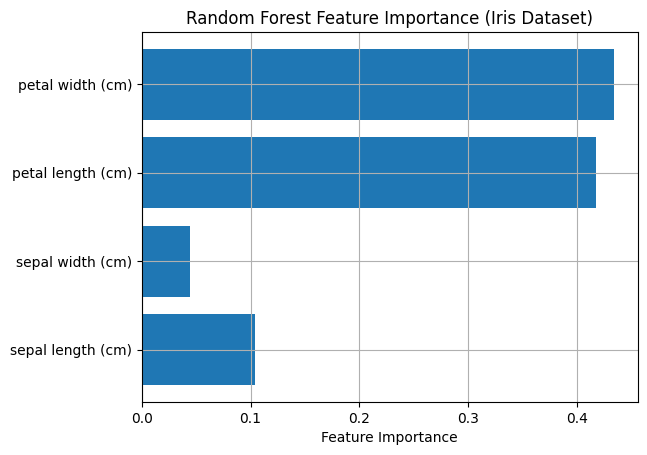

In [77]:
# Plot the feature importances
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (Iris Dataset)")
plt.grid(True)
plt.show()

## Gradient boosting algorithm implementation
Excellent for tabular data

Less prone to overfitting (with tuning)

Basis of powerful libraries like XGBoost, LightGBM, and CatBoost

In [78]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [79]:
# Load the Iris dataset
iris = load_iris()
X = iris.data        # Features
y = iris.target      # Labels: 0 = setosa, 1 = versicolor, 2 = virginica
 
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
 
# Train the model
gb_model.fit(X_train, y_train)
 
# Predict on the test data
y_pred = gb_model.predict(X_test)

In [80]:
# Evaluate the model
print("Gradient Boosting Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Gradient Boosting Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [81]:
# Predict a custom sample
sample = [[6.1, 2.8, 4.7, 1.2]]
prediction = gb_model.predict(sample)[0]
print(f"\nPrediction for sample {sample[0]}: {iris.target_names[prediction]}")
 


Prediction for sample [6.1, 2.8, 4.7, 1.2]: versicolor


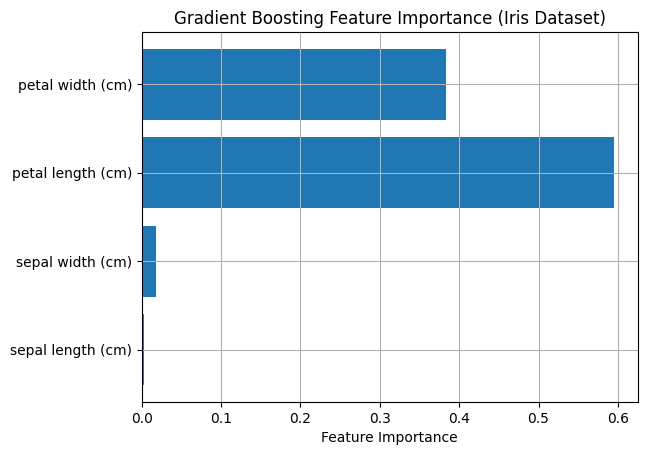

In [82]:
 # Plot feature importance
import matplotlib.pyplot as plt
 
feature_importances = gb_model.feature_importances_
features = iris.feature_names
 
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance (Iris Dataset)")
plt.grid(True)
plt.show()

## Anomaly detection using statistics
Uses Z-score to measure how far each data point is from the mean

Flags points that are unusually high or low as anomalies

Visualizes anomalies clearly with a simple line plot

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [84]:
 # Simulated dataset: daily transaction amounts in dollars
data = np.array([
    50, 52, 49, 51, 53, 48, 55, 54, 52, 49,
    51, 50, 500, 52, 47, 53, 49, 48, 700, 51
])

In [86]:
# Calculate Z-scores for each data point
z_scores = zscore(data)

 # Define a threshold for anomaly detection (e.g., |Z| > 2.5)
threshold = 2.5
anomalies = np.where(np.abs(z_scores) > threshold)
 
# Print anomalies
print("Anomaly Detection using Z-Score:\n")
for i in anomalies[0]:
    print(f"Index {i}: Value = {data[i]}, Z-score = {z_scores[i]:.2f}")

Anomaly Detection using Z-Score:

Index 18: Value = 700, Z-score = 3.54


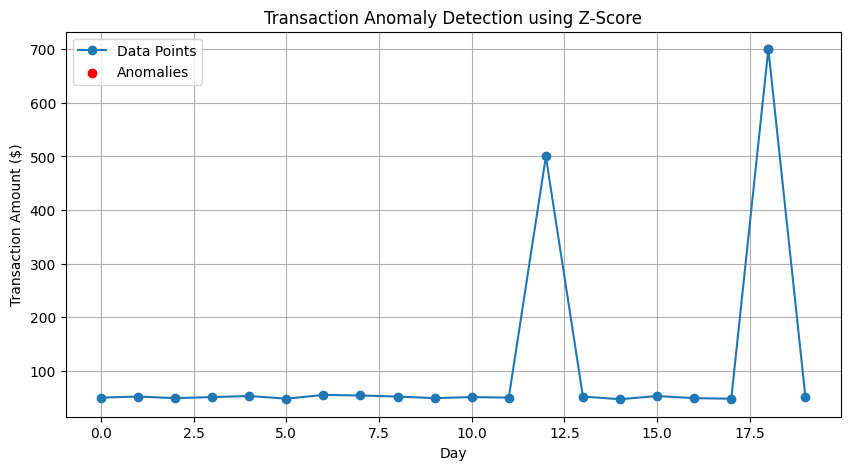

In [87]:
# Visualize data with anomalies
plt.figure(figsize=(10, 5))
plt.plot(data, marker='o', label='Data Points')
plt.scatter(anomalies, data[anomalies], color='red', label='Anomalies')
plt.title("Transaction Anomaly Detection using Z-Score")
plt.xlabel("Day")
plt.ylabel("Transaction Amount ($)")
plt.legend()
plt.grid(True)
plt.show()

## Principal component analysis implementation
Identifies the directions (principal components) of maximum variance

Projects data into lower dimensions with minimal information loss

Helps in visualization and preprocessing for machine learning

In [88]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [89]:
 # Load the Iris dataset
iris = load_iris()
X = iris.data        # 4 features
y = iris.target      # 3 classes: setosa, versicolor, virginica
labels = iris.target_names
 
# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [90]:
# Print explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance retained:", sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.92461872 0.05306648]
Total variance retained: 0.977685206318798


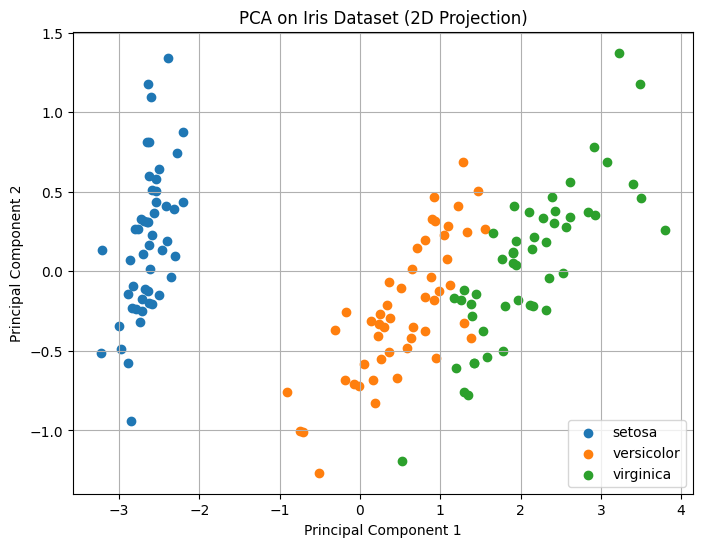

In [91]:
# Plot the 2D PCA result
plt.figure(figsize=(8, 6))
for i in range(len(labels)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=labels[i])
    
plt.title("PCA on Iris Dataset (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

## Feature selection techniques
eliminating irrelevant, redundant, or noisy data.

In [92]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [93]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [94]:
# Convert to DataFrame for clarity
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

In [95]:
# ---- 1. Univariate Selection (ANOVA F-test) ----
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)
selected_features_univariate = [feature_names[i] for i in selector.get_support(indices=True)]
 
print("Top 2 Features (Univariate Selection - ANOVA F-test):")
print(selected_features_univariate)

Top 2 Features (Univariate Selection - ANOVA F-test):
['petal length (cm)', 'petal width (cm)']


In [96]:
# ---- 2. Recursive Feature Elimination (RFE) ----
rfe_model = RFE(estimator=LogisticRegression(max_iter=200), n_features_to_select=2)
rfe_model.fit(X, y)
selected_features_rfe = [feature_names[i] for i in range(len(feature_names)) if rfe_model.support_[i]]
 
print("\nTop 2 Features (Recursive Feature Elimination):")
print(selected_features_rfe)


Top 2 Features (Recursive Feature Elimination):
['petal length (cm)', 'petal width (cm)']


In [97]:
# ---- 3. Feature Importance from Random Forest ----
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
feature_importances = rf_model.feature_importances_

In [98]:
# Rank and select top 2
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)
 
print("\nFeature Importances (Random Forest):")
print(importance_df)


Feature Importances (Random Forest):
             Feature  Importance
2  petal length (cm)    0.436130
3   petal width (cm)    0.436065
0  sepal length (cm)    0.106128
1   sepal width (cm)    0.021678


In [99]:
# Display top 2
top_features_rf = importance_df["Feature"].values[:2]
print("\nTop 2 Features (Random Forest Importance):")
print(top_features_rf)


Top 2 Features (Random Forest Importance):
['petal length (cm)' 'petal width (cm)']


## Cross-validation implementation
Trains and evaluates a Logistic Regression model using 5-fold cross-validation.

Computes and prints the accuracy for each fold, along with the mean and standard deviation.

In [100]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

In [101]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=200)
 
# Define 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
 
# Perform cross-validation and get accuracy for each fold
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

In [102]:
# Output results
print("Cross-Validation Accuracies (5-Fold):", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation: {np.std(cv_scores):.2f}")

Cross-Validation Accuracies (5-Fold): [1.         1.         0.93333333 0.96666667 0.96666667]
Mean Accuracy: 0.97
Standard Deviation: 0.02
